<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize as op

In [100]:
theta = lambda x: x - np.sin(x) - np.pi/2

In [101]:
x= np.arange(0,2*np.pi, 0.01)
y = theta(x)

In [102]:
d = {'Theta': x, 'Funcion': y}
df = pd.DataFrame(d)

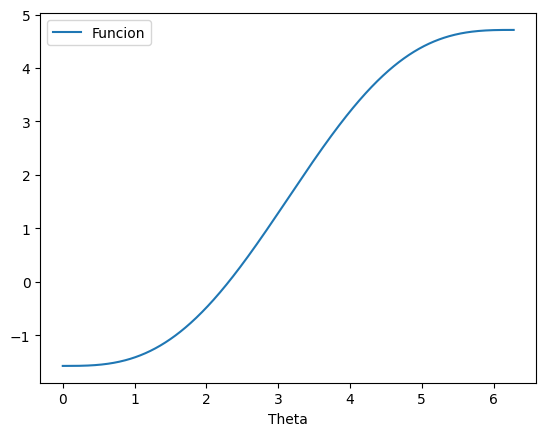

In [104]:
df.plot.line(x= 'Theta', y= 'Funcion')

plt.show()

<Axes: xlabel='Theta'>

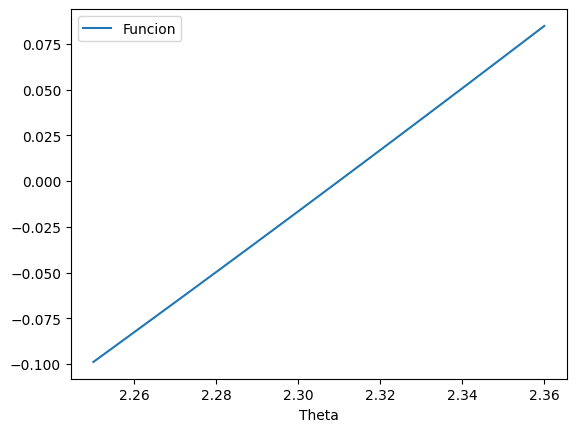

In [105]:
df_filtro = df[df.Funcion.between(-0.1,0.1)] #creando nuevo dataframe en base a la columna funcion
df_filtro.plot.line( x= 'Theta', y= 'Funcion')
#df_filtro

In [163]:
#metodo de biseccion
op.bisect?

In [109]:
raiz= op.bisect(theta, 2.30,2.31)
print('la raiz usando el metod de la biseccion sera', raiz)

la raiz usando el metod de la biseccion sera 2.3098814600089104


In [110]:

#metodo de newton rhapson, debemos emplear la primera derivada
dtheta = lambda x: 1 - np.cos(x)

In [113]:
raiz_newton = op.newton(theta, 2.30, dtheta)
print('la raiz empleando el metodo de newton rhapson sera: ', raiz_newton)

la raiz empleando el metodo de newton rhapson sera:  2.309881460010057


In [129]:
# metodo de punto fijo
op.fixed_point?

In [115]:
fixed_theta= lambda x: x- theta(x)

In [117]:
raiz_fijo= op.fixed_point(fixed_theta, 2.30)
print('la raiz por el metodo de punto fijo será', raiz_fijo)

la raiz por el metodo de punto fijo será 2.3098814600100575


In [119]:
#metodo de secante
raiz_secante = op.newton(theta, 2.30)
print('la raiz empleando el metodo de newton rhapson sera: ', raiz_secante)

la raiz empleando el metodo de newton rhapson sera:  2.3098814600100575


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.

In [161]:

def alt(t,s0,m,k,g):

  h1=m*g*t/k
  h2=(m**2)*g*t/k
  h3=1-np.exp(-k*t/m)
  return s0-h1+(h2*h3)
def altD(t,s0,m,k,g):
  d1=g*m*t*np.exp(-k*t/m)
  d2= g*m/k
  d3=(g*(m**2)*(1-np.exp(-k*t/m)))/k
  return d1-d2+d3



In [170]:
#Por medio del metodo de secante
Cero1= op.newton(alt,0.01, args=(300,0.25,0.1,32.17))
print(Cero1)
#Por medio del metodo de punto fijo
Cero2= op.fixed_point(alt,0.01, args=(300,0.25,0.1,32.17))
print(Cero2)
#Por medio del método de newton
Cero3= op.newton(alt,0.01, altD,args=(300,0.25,0.1,32.17))
print(Cero3)
#Por medio del método de bisección
Cero4= op.bisect(alt, -5,5,args=(300,0.25,0.1,32.17))
print(Cero4)


4.73613913760349
4.65534478295253
4.736139137603489
4.736139137604596


Podemos concluir que el tiempo que demora la moneda en tocar el suelo es al rededor  4.736 segundos

In [153]:
import sympy as sp
t=sp.Symbol("t")
g=sp.Symbol("g")
k=sp.Symbol("k")
m=sp.Symbol("m")
s0=sp.Symbol("s0")
def alt(t):
  h1=m*g*t/k
  h2=(m**2)*g*t/k
  h3=1-sp.exp(-k*t/m)
  return s0-h1+(h2*h3)
altD=sp.diff(alt(t),t)
altD

g*m*t*exp(-k*t/m) + g*m**2*(1 - exp(-k*t/m))/k - g*m/k

3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [171]:
#punto a
def magnet(Y):
  return   np.tanh(Y/0.5)-Y

magnet1=  op.newton(magnet,10)
print(f"La magnetización es {magnet1:.4f}")
#punto b


def magnet_fixed(Y):
  return   Y-magnet(Y)

magnet2= op.fixed_point(magnet_fixed,0.9)
print(f"La magnetización es {magnet2:.4f}")




La magnetización es 0.9575
La magnetización es 0.9575


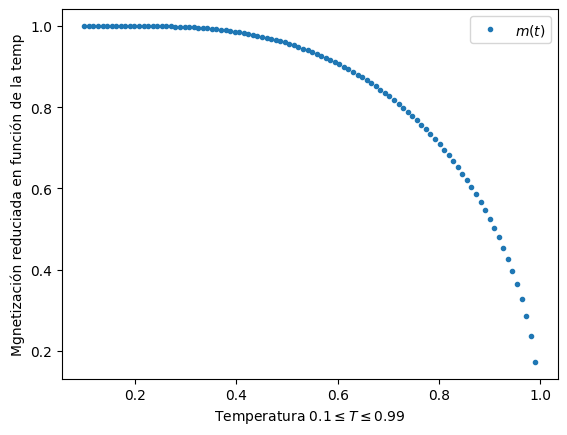

In [172]:
#punto d
T= np.linspace(0.1,0.99,100)
def magnet_ts(Y,T):
    return   np.tanh(Y/T)-Y
Zs=[]

for i in T:
   Zs.append(op.newton(magnet_ts,100, args=(i,)))
plt.plot(T,Zs, ".",label="$m(t)$")
plt.xlabel( r'Temperatura $0.1\leq T \leq 0.99$ ')
plt.ylabel("Mgnetización reduciada en función de la temp")
plt.legend();


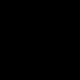

In [173]:

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial
image

In [174]:

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

print(zx)
print(zy)
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
W=complex(2,5)
W

[-1.         -0.97468354 -0.94936709 -0.92405063 -0.89873418 -0.87341772
 -0.84810127 -0.82278481 -0.79746835 -0.7721519  -0.74683544 -0.72151899
 -0.69620253 -0.67088608 -0.64556962 -0.62025316 -0.59493671 -0.56962025
 -0.5443038  -0.51898734 -0.49367089 -0.46835443 -0.44303797 -0.41772152
 -0.39240506 -0.36708861 -0.34177215 -0.3164557  -0.29113924 -0.26582278
 -0.24050633 -0.21518987 -0.18987342 -0.16455696 -0.13924051 -0.11392405
 -0.08860759 -0.06329114 -0.03797468 -0.01265823  0.01265823  0.03797468
  0.06329114  0.08860759  0.11392405  0.13924051  0.16455696  0.18987342
  0.21518987  0.24050633  0.26582278  0.29113924  0.3164557   0.34177215
  0.36708861  0.39240506  0.41772152  0.44303797  0.46835443  0.49367089
  0.51898734  0.5443038   0.56962025  0.59493671  0.62025316  0.64556962
  0.67088608  0.69620253  0.72151899  0.74683544  0.7721519   0.79746835
  0.82278481  0.84810127  0.87341772  0.89873418  0.92405063  0.94936709
  0.97468354  1.        ]
[-1.         -0.97468354 

(2+5j)

In [175]:
x = - 1
eps = 1E-8
a = 0.2
Niteraciones = 120
for zx_ in zx:
  x = x + 1
  y = -1
  #print(x)
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)          #La parte imaginaria es zy_ y z_x es la parte real
      #print(Z_0)

      for i in range(0, Niteraciones):               #Newton Raphson, encontrando los ceros
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        #print(Z)

        if( abs(Z-Z_0)<= eps):
          break
W=complex(2,5)
f(W)

(-143-65j)

Punto 5


In [176]:

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          #print(i)
          breakzasswe

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16          #Escala de colores
      #print(r,g,b)

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)

NameError: name 'breakzasswe' is not defined

In [ ]:
 image.putpixel?

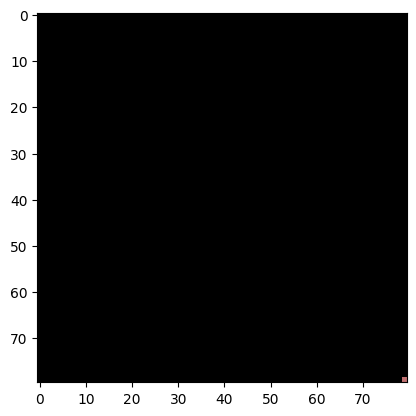

In [ ]:

Niteraciones = 120
eps = 1E-8
a = 0.2
x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1

      for i in range(0, Niteraciones):
        r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16



image.putpixel((x,y), (r,g,b) )
plt.imshow(image)
